# 蛋白-蛋白相互作用(PPI)分析

STRING是一个已知和预测的蛋白质相互作用的数据库。相互作用包括直接(物理)和间接(功能)关联;它们源于计算预测，源于生物之间的知识转移，源于其他(主要)数据库汇总的交互。    

在这里，我们制作了一个教程，使用python构建蛋白质-蛋白质相互作用    

Colab_Reproducibility：https://colab.research.google.com/drive/1ReLCFA5cNNcem_WaMXYN9da7W0GN4gzl?usp=sharing

In [4]:
import omicverse as ov
ov.utils.ov_plot_set()

/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


这里我们使用string-db的示例数据来执行分析

FAA4及其10位最自信的互动者。酵母中的FAA4是一种长链脂肪酸酰基辅酶a合成酶;它与其他合成酶和调节因子相连。

其他名称:ATCC 18824，念珠菌robusta, NRRL Y-12632，酿酒酵母，capomyces capensis, Saccharomyces italicus, Saccharomyces oviformis, Saccharomyces uvarum var. melibiosus，啤酒酵母，酵母

In [1]:
gene_list=['FAA4','POX1','FAT1','FAS2','FAS1','FAA1','OLE1','YJU3','TGL3','INA1','TGL5']

此外，我们还需要设置基因的类型和颜色。在这里，我们随机设置前5个基因命名为Type1，其他命名为Type2

In [2]:
gene_type_dict=dict(zip(gene_list,['Type1']*5+['Type2']*6))
gene_color_dict=dict(zip(gene_list,['#F7828A']*5+['#9CCCA4']*6))

## string 互作用分析

网络API方法还允许您以各种文本格式检索一个或多个蛋白质的STRING交互网络。它会告诉你这组蛋白质的综合得分和所有通道特定得分。您还可以通过设置`add_node`来扩展网络邻居，这将按照他们的信心顺序向您的网络添加新的交互伙伴。

In [5]:
G_res=ov.bulk.string_interaction(gene_list,4932)
G_res.head()

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,4932.YBR041W,4932.YKL182W,FAT1,FAS1,4932,0.576,0,0,0,0.121,0,0,0.538
1,4932.YBR041W,4932.YOR081C,FAT1,TGL5,4932,0.601,0,0,0,0,0,0,0.601
2,4932.YBR041W,4932.YPL231W,FAT1,FAS2,4932,0.63,0,0,0,0.113,0,0,0.6
3,4932.YBR041W,4932.YGL055W,FAT1,OLE1,4932,0.669,0,0,0,0.055,0.225,0,0.584
4,4932.YBR041W,4932.YKL094W,FAT1,YJU3,4932,0.762,0,0,0,0.052,0.614,0,0.402


然后我们连接到string-db来计算蛋白质之间的相互作用

## STRING PPI 网络
我们也可以使用`ov.bulk.pyPPI`来获取`gene_list`的PPI网络，我们先初始化它

In [6]:
ppi=ov.bulk.pyPPI(gene=gene_list,
                      gene_type_dict=gene_type_dict,
                      gene_color_dict=gene_color_dict,
                      species=4932)


然后我们连接到string-db来计算蛋白质之间的相互作用

In [7]:
ppi.interaction_analysis()

我们提供了一个非常简单的函数来绘制网络，您可以参考`ov.utils.plot_network`来查找参数

(<Figure size 320x320 with 1 Axes>, <AxesSubplot: >)

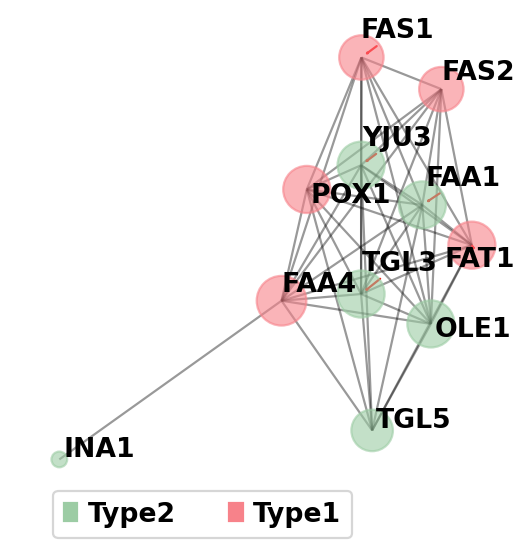

In [8]:
ppi.plot_network()